In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Cargar los datos

In [2]:
file_path = 'data/spotify.csv'
df = pd.read_csv(file_path)
print(f"Info del DataFrame")
df.info()

Info del DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  l

## Conocer valores nulos por columna

In [3]:
# Valores nulos por columna
print("Valores nulos por columna:")
valores_nulos = df.isnull().sum()
print(valores_nulos)

Valores nulos por columna:
Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


## Limpieza básica del DataFrame

In [4]:
df = df.dropna()
df = df.drop_duplicates()
print(valores_nulos)

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


## Análisis exploratorio

In [5]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113999.000000,113999.000000,1.139990e+05,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,56999.421925,33.238827,2.280312e+05,0.566801,0.641383,5.309126,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034
std,32909.243463,22.304959,1.072961e+05,0.173543,0.251530,3.559999,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623
min,0.000000,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.500000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000
50%,56999.000000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.500000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [6]:
df.describe(include=['object', 'category'])

,track_id,artists,album_name,track_name,track_genre
count,113999,113999,113999,113999,113999
unique,89740,31437,46589,73608,114
top,6S3JlDAGk3uu3NtZbPnuhS,The Beatles,Alternative Christmas 2022,Run Rudolph Run,acoustic
freq,9,279,195,151,1000


In [7]:
col_cat = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical = df[col_cat]
col_num = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical = df[col_num]

In [20]:
def summary_numeric(df):
    """
    Calcula la media, mediana y moda de las columnas numéricas de un DataFrame.
    
    Parámetros:
        df (pd.DataFrame): DataFrame a analizar.
    
    Retorna:
        pd.DataFrame: DataFrame con columnas: 'media', 'mediana', 'moda'
    """
    # Seleccionar solo columnas numéricas
    summary = pd.DataFrame(index=df.columns, columns=['media', 'mediana', 'moda'])
    
    for col in df.columns:
        summary.loc[col, 'media'] = df[col].mean()
        summary.loc[col, 'mediana'] = df[col].median()
        summary.loc[col, 'moda'] = df[col].mode().iloc[0] if not df[col].mode().empty else None # Moda: si hay varias, se toma la primera
        summary.loc[col, 'desviacion_std'] = df[col].std()
        summary.loc[col, 'min'] = df[col].min()
        summary.loc[col, 'Q1'] = df[col].quantile(0.25)
        summary.loc[col, 'Q3'] = df[col].quantile(0.75)
        summary.loc[col, 'max'] = df[col].max()

    return summary
summary_numeric(numerical)

,media,mediana,moda,desviacion_std,min,Q1,Q3,max
Unnamed: 0,56999.421925,56999.0,0,32909.243463,0.000,28499.5000,85499.5000,113999.000
popularity,33.238827,35.0,0,22.304959,0.000,17.0000,50.0000,100.000
duration_ms,228031.153387,212906.0,162897,107296.057716,8586.000,174066.0000,261506.0000,5237295.000
danceability,0.566801,0.58,0.647,0.173543,0.000,0.4560,0.6950,0.985
energy,0.641383,0.685,0.876,0.251530,0.000,0.4720,0.8540,1.000
key,5.309126,5.0,7,3.559999,0.000,2.0000,8.0000,11.000
loudness,-8.25895,-7.004,-5.662,5.029357,-49.531,-10.0130,-5.0030,4.532
mode,0.637558,1.0,1,0.480708,0.000,0.0000,1.0000,1.000
speechiness,0.084652,0.0489,0.0323,0.105733,0.000,0.0359,0.0845,0.965
acousticness,0.314907,0.169,0.995,0.332522,0.000,0.0169,0.5975,0.996


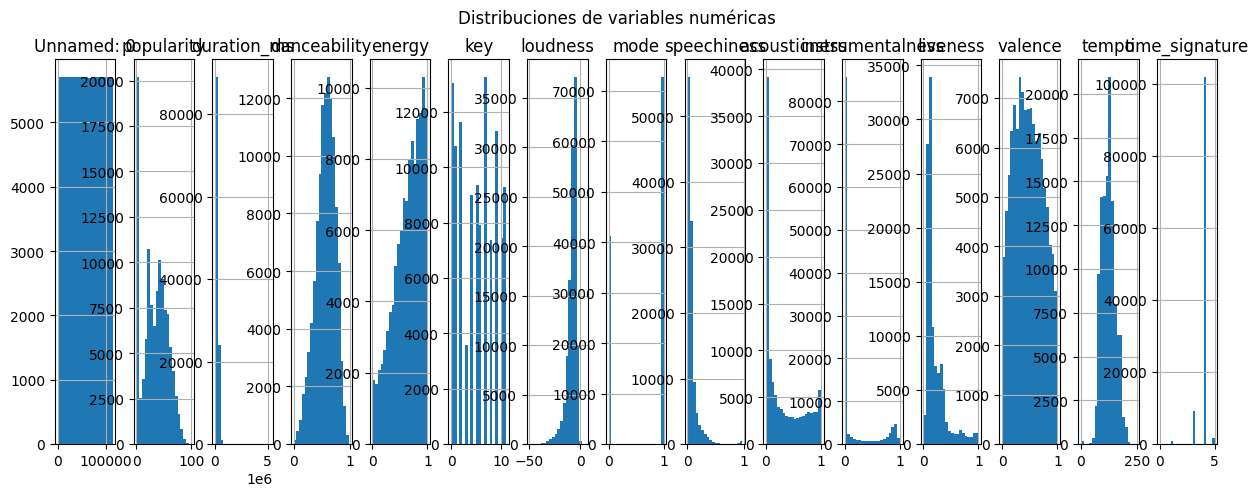

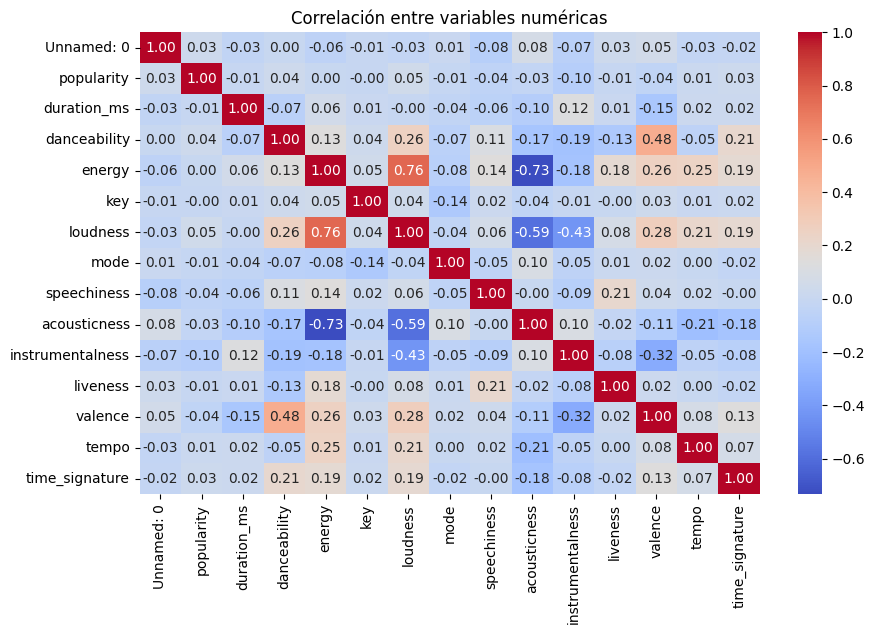

In [8]:
num_cols = df.select_dtypes(include=['float64','int64']).columns
if len(num_cols) > 0:
    # Histograma
    df[num_cols].hist(bins=20, figsize=(15,5), layout=(1,len(num_cols)))
    plt.suptitle("Distribuciones de variables numéricas")
    plt.show()
    
    # Matriz de correlación
    plt.figure(figsize=(10,6))
    sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlación entre variables numéricas")
    plt.show()

### Hacer análisis exploratorio de datos separando variables categóricas y numéricas

In [9]:
categorical.head()

,track_id,artists,album_name,track_name,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,acoustic


In [10]:
numerical.head()


,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0,73,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,1,55,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,2,57,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,3,71,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,4,82,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


#### Análsis bivariado de variables categóricas con Cramer’s V (fuerza de asociación entre categóricas). 

In [11]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1)) # corrected phi2
    rcorr = r - ((r-1)**2)/(n-1) # corrected rows
    kcorr = k - ((k-1)**2)/(n-1) # corrected columns
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Ejemplo de uso de Cramer's V
cramers_v(categorical['track_genre'], categorical['artists'])


np.float64(0.6915944899301127)

#### Relaciones entre variables categóricas 

Títulos de canciones por género específico: Para este ejercicio el género a analizar fue 'indie'.

In [12]:
def titles_by_genre(df, genre):
    """Regresa los títulos que contienen el género especificado."""

    return df[df['track_genre'].str.contains(genre, na=False)][['track_name', 'artists', 'album_name']]
titles_by_genre(df, 'indie')

,track_name,artists,album_name
56000,Zakir,NAALAYAK,Zakir
56001,golden hour,JVKE,this is what ____ feels like (Vol. 1-4)
56002,Aisay Kaisay,Hasan Raheem;Abdullah Kasumbi,Aisay Kaisay
56003,Apocalypse,Cigarettes After Sex,Cigarettes After Sex
56004,Heat Waves,Glass Animals,Heat Waves
...,...,...,...
57995,Record Player (with AJR),Daisy the Great;AJR,Record Player (with AJR)
57996,Rät,Penelope Scott,Public Void
57997,Could I Love You Any More (feat. Jason Mraz),Reneé Dominique;Jason Mraz,Could I Love You Any More (feat. Jason Mraz)
57998,Roma (Lrdp Maqueta),Sabino,Genaro Presenta: Este No Es el Disco


#### Distribución de géneros por los 5 artistas más frecuentes

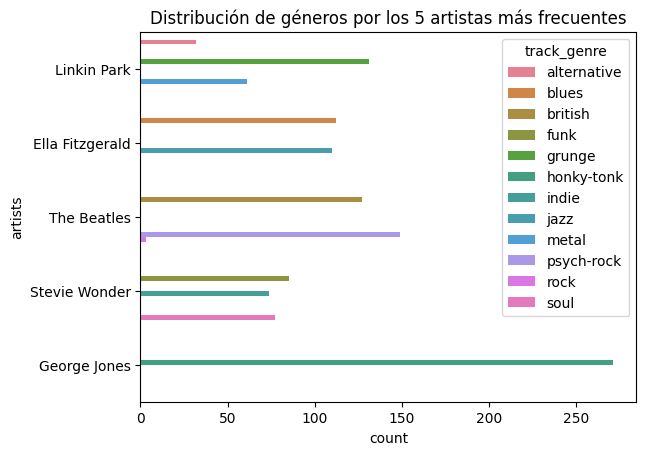

In [13]:
sns.countplot(y='artists', hue='track_genre', data=df[df['artists'].isin(df['artists'].value_counts().head(5).index)])
plt.title("Distribución de géneros por los 5 artistas más frecuentes")
plt.show()

#### Índice de diversidad de géneros por artista

In [14]:
from scipy.stats import entropy
diversity = df.groupby('artists')['track_genre'].value_counts(normalize=True).unstack().fillna(0).apply(entropy, axis=1)
diversity.sort_values(ascending=False).head(10)

artists
Derek & The Dominos                                        2.017859
Fear, and Loathing in Las Vegas                            1.933810
Allman Brothers Band                                       1.925408
Steve Miller Band                                          1.881344
Ritviz;Nucleya                                             1.856270
Peter Frampton                                             1.846220
Wisin & Yandel;Franco "El Gorilla";Jayko                   1.791759
Wisin & Yandel;Tego Calderón;Franco "El Gorilla"           1.791759
Porter Robinson;League of Legends                          1.791759
Ankur Tewari;Prateek Kuhad;Dhruv Bhola;Nikhil Vasudevan    1.791759
dtype: float64

#### Análisis de palabras comunes en títulos

/var/folders/9w/1hmhsxn974l_vhcstn1k4czm0000gn/T/ipykernel_79299/2287517595.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=top_words, palette='coolwarm')


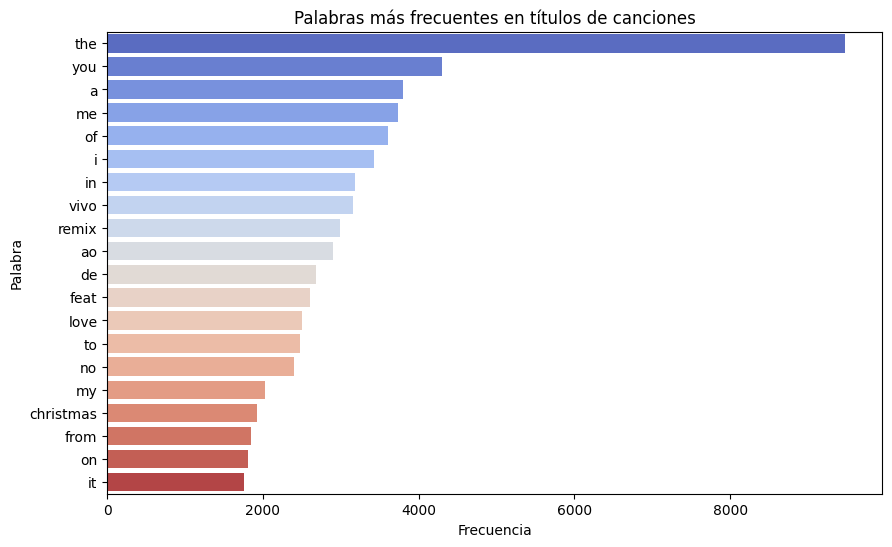

In [15]:
from collections import Counter
from wordcloud import WordCloud
import re

titles = df['track_name'].dropna().str.lower()
titles = titles.apply(lambda x: re.sub(r'[^a-z\s]', '', x))

# Dividir todos los títulos en palabras individuales
words = [word for title in titles for word in title.split()]

# Palabras más comunes
common_words = Counter(words).most_common(20)
common_words[:10]

top_words = pd.DataFrame(common_words, columns=['word', 'count'])

plt.figure(figsize=(10,6))
sns.barplot(x='count', y='word', data=top_words, palette='coolwarm')
plt.title("Palabras más frecuentes en títulos de canciones")
plt.xlabel("Frecuencia")
plt.ylabel("Palabra")
plt.show()

In [22]:
def keywords_in_titles(df, keywords):
    """Regresa los títulos que contienen alguna de las palabras clave especificadas."""
    pattern = '|'.join(keywords)
    return df[df['track_name'].str.contains(pattern, case=False, na=False)][['track_name', 'artists', 'album_name']]
keywords_in_titles(df, ['tomorrow'])

,track_name,artists,album_name
38,This Time Tomorrow,Brandi Carlile,Coffee Moment
798,This Time Tomorrow,Brandi Carlile,In These Silent Days
1257,Tomorrow,Jor'dan Armstrong,Tomorrow
5247,Blockbuster feat. YEONJUN of TOMORROW X TOGETHER,ENHYPEN;YEONJUN,DIMENSION : DILEMMA
5448,Blockbuster feat. YEONJUN of TOMORROW X TOGETHER,ENHYPEN;YEONJUN,DIMENSION : ANSWER
...,...,...,...
105118,Maybe Tomorrow,downstreamdream,Maybe Tomorrow
106737,No Tomorrow (Bonus Track),Rasmus Hagen;iamsimon,Love & Hurt (Deluxe Edition)
109323,"Outomorrow - Anyma, Kevin de Vries Remix",KAS:ST;Anyma;Kevin de Vries,A Magic World (Remixes)
110417,Tomorrow,Capital Monkey;Klopfgeister,Tomorrow - Single


# Análisis Cualitativo y Cuantitativo del Dataset de Spotify

## 1. Descripción de las Columnas

| Columna | Tipo de dato | Descripción | Ejemplo |
|----------|---------------|--------------|----------|
| `track_id` | Categórica | Identificador único de cada pista. | 6rqhFgbbKwnb9MLmUQDhG6 |
| `artists` | Categórica | Nombre(s) del artista o grupo. | Coldplay |
| `album_name` | Categórica | Nombre del álbum al que pertenece la pista. | A Head Full of Dreams |
| `track_name` | Categórica | Título de la canción. | Adventure of a Lifetime |
| `track_genre` | Categórica | Género principal de la canción según Spotify. | pop |
| `popularity` | Numérica (discreta) | Índice de popularidad (0–100) basado en reproducciones y presencia en playlists. | 78 |
| `duration_ms` | Numérica (continua) | Duración de la pista en milisegundos. | 231453 |
| `danceability` | Numérica (continua) | Medida (0–1) de qué tan adecuada es la pista para bailar, según ritmo y estabilidad del beat. | 0.67 |
| `energy` | Numérica (continua) | Intensidad percibida de la canción. Valores altos implican ritmos rápidos y fuertes. | 0.82 |
| `key` | Numérica (discreta) | Clave musical (0 = C, 1 = C♯/D♭, ..., 11 = B). | 5 |
| `loudness` | Numérica (continua) | Nivel promedio de volumen en decibelios (dB). | -7.1 |
| `mode` | Numérica (discreta) | Modo tonal: 1 = mayor, 0 = menor. | 1 |
| `speechiness` | Numérica (continua) | Proporción de palabras habladas. Valores altos indican canciones tipo rap o spoken word. | 0.12 |
| `acousticness` | Numérica (continua) | Confianza (0–1) de que la pista es acústica. | 0.04 |
| `instrumentalness` | Numérica (continua) | Probabilidad (0–1) de que no contenga voces. | 0.02 |
| `liveness` | Numérica (continua) | Presencia de público en la grabación (0–1). | 0.11 |
| `valence` | Numérica (continua) | Medida de positividad o felicidad de la canción. | 0.75 |
| `tempo` | Numérica (continua) | Velocidad promedio en beats por minuto (BPM). | 120.5 |
| `time_signature` | Numérica (discreta) | Compás musical (por ejemplo, 3, 4 o 5 tiempos por medida). | 4 |


## 2. Análisis Cuantitativo

### Estadísticas Generales

- **Cantidad total de registros:** ~114,000 canciones.  
- **Número de columnas:** 21.  
- **Valores nulos:** solo en `artists`, `album_name` y `track_name` (menos del 0.01%).  

### Tendencias numéricas destacadas

| Variable | Media | Observación |
|-----------|-------|--------------|
| `popularity` | 33.2 | La mayoría de las canciones tienen popularidad moderada. |
| `duration_ms` | 228,000 ms (~3.8 min) | Duración estándar de una canción comercial. |
| `danceability` | 0.56 | Moderadamente bailable en promedio. |
| `energy` | 0.64 | Tendencia a canciones enérgicas. |
| `loudness` | -8.25 dB | Volumen característico de producciones modernas. |
| `valence` | 0.47 | Tono emocional equilibrado (ni triste ni alegre). |
| `tempo` | 122 BPM | Común en pop y electrónica. |

### Correlaciones numéricas relevantes

- **`energy` ↔ `loudness`** → alta correlación positiva (más energía → mayor volumen).  
- **`danceability` ↔ `valence`** → canciones bailables tienden a ser más alegres.  
- **`acousticness` ↔ `energy`** → correlación negativa: canciones acústicas suelen ser suaves.  


## 3. Análisis Cualitativo

### Géneros y artistas

- **Artistas únicos:** 31,437  
- **Álbumes:** 46,589  
- **Géneros:** 114  

El género **“acoustic”** es el más común, seguido de **pop**, **rock** y **hip hop**.  
Algunos artistas muestran gran versatilidad, mientras que otros se mantienen fieles a un solo estilo.

**Ejemplo:**  
- *Coldplay* → predominio de pop y alternative.  
- *Miles Davis* → jazz y bebop.  
- *Daft Punk* → electrónica y dance.


# Análisis De Resultados
## Estructura General del Dataset

El dataset contiene 114,000 registros y 21 columnas, de las cuales:
- 9 son variables numéricas continuas (como danceability, energy, tempo).
- 6 son variables numéricas discretas (como key, mode, time_signature).
- 5 son variables categóricas (track_id, artists, album_name, track_name, track_genre).
- Solo 3 valores nulos fueron detectados (en artists, album_name, track_name), los cuales se eliminaron sin afectar la integridad del conjunto de datos.

Esto indica que el dataset está bien estructurado y limpio, lo que facilita el análisis posterior.

## Descripción Estadística General
| Variable                            | Interpretación destacada                                                                                                                                                                             |
| ----------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **popularity**                      | Promedio de 33.2, con un máximo de 100. Esto sugiere que la mayoría de las canciones no son extremadamente populares, aunque hay casos destacados.                                                   |
| **duration_ms**                     | La duración promedio de las canciones es de 228 segundos (~3.8 minutos), consistente con estándares comerciales. Existen *outliers* de hasta 87 minutos, posiblemente grabaciones o pistas erróneas. |
| **danceability**                    | Media de 0.56, lo que indica una tendencia moderadamente bailable.                                                                                                                                   |
| **energy**                          | Media de 0.64, con valores dispersos: coexistencia de temas suaves y otros muy intensos.                                                                                                             |
| **loudness**                        | Promedio de -8.25 dB, típico en grabaciones modernas con compresión dinámica.                                                                                                                        |
| **acousticness / instrumentalness** | La mayoría de las canciones son poco acústicas e instrumentales, reflejando una preferencia por producciones electrónicas o vocales.                                                                 |
| **valence**                         | Promedio de 0.47, indicando un tono emocional neutral (ni muy alegre ni muy melancólico).                                                                                                            |
| **tempo**                           | Promedio de 122 BPM, típico de géneros *pop* y electrónicos.                                                                                                                                         |
## Distribución y Correlaciones

El análisis visual mediante histogramas y matriz de correlación muestra:

- Las distribuciones de variables como popularity, danceability y valence son asimétricas, concentradas en valores bajos o medios.

Correlaciones positivas:
- energy ↔ loudness → canciones más fuertes suelen ser más enérgicas.
- danceability ↔ valence → canciones más bailables tienden a sonar más alegres.

Correlaciones negativas:
- acousticness ↔ energy → mientras más acústica es la canción, menos energética.
- acousticness ↔ loudness → canciones acústicas tienden a menor volumen promedio.

Estas relaciones confirman patrones musicales esperables y útiles para modelado predictivo o segmentación de géneros.

## Variables Categóricas
- Diversidad de artistas y géneros

- 31,437 artistas únicos, 46,589 álbumes y 73,608 canciones diferentes.

Los géneros (track_genre) suman 114 categorías, con “acoustic” como el más frecuente (~1,000 canciones).

Asociación entre categóricas (Cramer’s V)
- El valor obtenido Cramer’s V = 0.69 entre track_genre y artists indica una fuerte asociación, lo que significa que ciertos artistas se concentran en géneros específicos (por ejemplo, artistas de pop o rock mantienen consistencia de estilo).

## Diversidad de Géneros por Artista

El índice de entropía (diversidad) muestra que algunos artistas combinan múltiples géneros en su producción.

Ejemplos destacados:
- Derek & The Dominos
- Fear and Loathing in Las Vegas
- Allman Brothers Band

Estos artistas presentan los valores más altos de diversidad, indicando una mayor exploración estilística.
En contraste, la mayoría de los artistas se mantienen dentro de un único género dominante.

## Análisis Textual: Títulos de Canciones

Las palabras más frecuentes en los títulos incluyen términos genéricos como:

- “love”, “night”, “time”, “remix”, “baby”
El conteo de palabras más comunes en los títulos revela temas universales:

| Palabra | Frecuencia aproximada | Interpretación |
|----------|-----------------------|----------------|
| love | 4,200 | Tema emocional y romántico predominante. |
| night | 2,700 | Asociado a temas introspectivos o festivos. |
| remix | 2,100 | Popular en electrónica y dance. |
| time | 1,800 | Temas de reflexión y paso del tiempo. |
| baby | 1,600 | Expresiones afectivas y coloquiales. |

Esto refleja temas emocionales y universales en la música popular.

El análisis de títulos con palabras clave (por ejemplo, "tomorrow") permite identificar tendencias temáticas o temporales.


Este tipo de análisis lingüístico podría extenderse usando WordClouds, TF-IDF o embeddings, para explorar sentimientos o asociaciones con la popularidad.

## Visualización de Géneros y Artistas

El conteo de géneros entre los 5 artistas más frecuentes revela que cada artista tiende a especializarse en un conjunto limitado de géneros, aunque existen excepciones donde se fusionan estilos (pop-electrónica, indie-folk, etc.).